In [13]:
import os
from osgeo import gdal, ogr, osr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import cartopy.crs as ccrs

In [15]:
def scaleCCMinMax(x):
    return(x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x, 2))

### Read in all data & Visual check & Convert to table

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


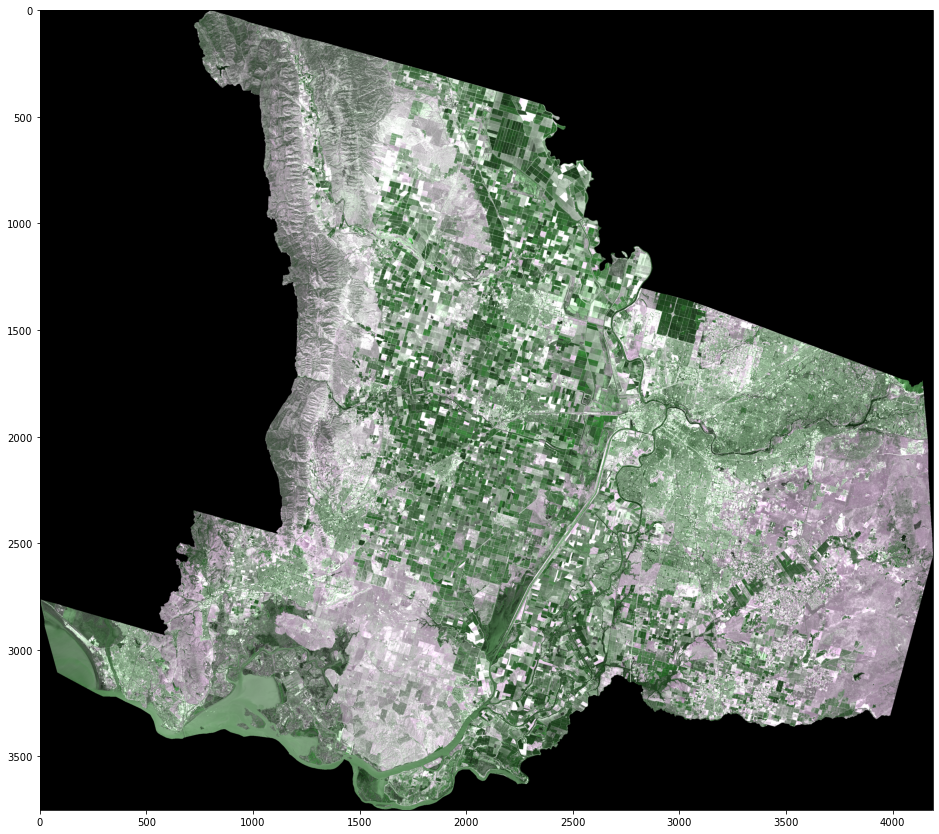

(3751, 4188, 7)
(7, 4188, 3751)
(15709188, 7)


In [11]:
raster_dir = '../data/Data'

for file in os.listdir(raster_dir):
    if file.endswith('SRB1_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        CAerosol = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB2_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        BLUE = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB3_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        GREEN = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB4_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        RED = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB5_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        NIR = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB6_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        SWIR1 = raster.GetRasterBand(1).ReadAsArray()
    elif file.endswith('SRB7_clip.tif'):
        raster = gdal.Open(os.path.join(raster_dir, file))
        SWIR2 = raster.GetRasterBand(1).ReadAsArray()

raster_array = np.dstack((CAerosol, BLUE, GREEN, RED, NIR, SWIR1, SWIR2))/10000
Image_Pre_Check = np.dstack((scaleCCMinMax(raster_array[:, :, 3]), scaleCCMinMax(raster_array[:, :, 2]), scaleCCMinMax(raster_array[:, :, 3])))
plt.figure(figsize=(16, 16))
plt.imshow(Image_Pre_Check)
# plt.savefig('../results/Image_Pre_Check.png')
plt.show()

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection=raster.GetProjection())
# ax.imshow(Image_Pre_Check)
# plt.show()

print(raster_array.shape)

raster_array_t = raster_array.transpose()
print(raster_array_t.shape)

raster_array_table = raster_array_t.reshape(raster_array_t.shape[0], (raster_array_t.shape[1]*raster_array_t.shape[2])).transpose()
print(raster_array_table.shape)

### Prepare Training label

In [21]:
groundTruth_path = '../data/GroundTruth/CDL_2021_06_clip.tif'

raster = gdal.Open(groundTruth_path)
groundTruth = raster.GetRasterBand(1).ReadAsArray()
print(groundTruth.shape)

groundTruth_table = groundTruth.reshape(1, (groundTruth.shape[0]*groundTruth.shape[1])).transpose()
print(groundTruth_table.shape)

(3751, 4188)
(15709188, 1)


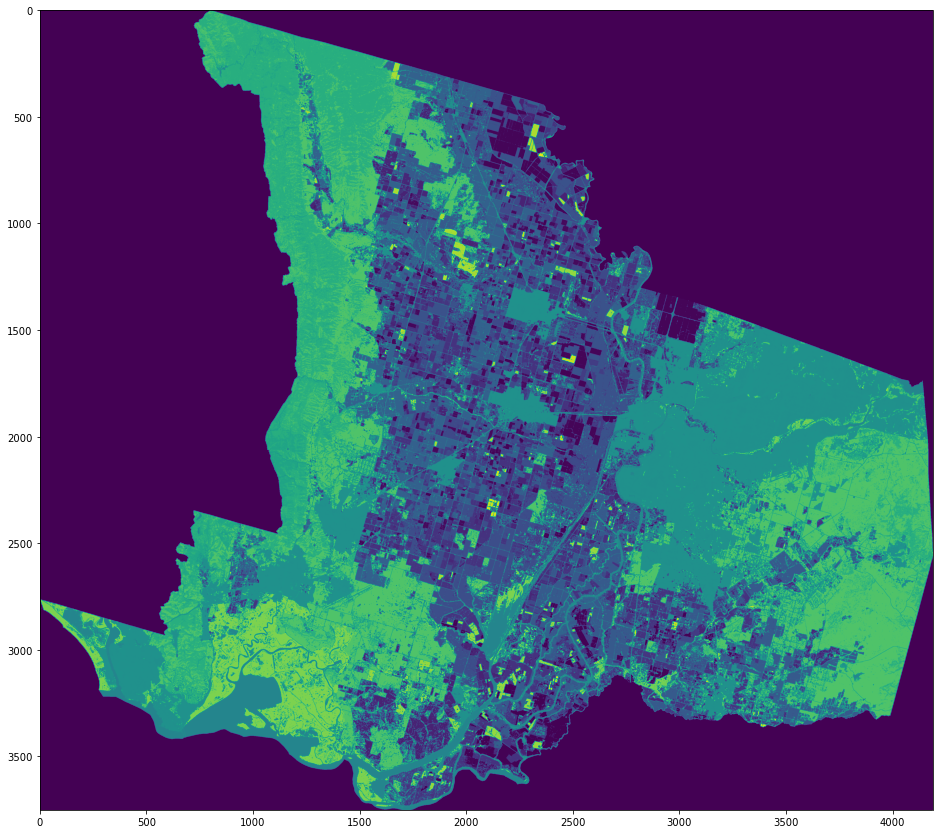

In [54]:
plt.figure(figsize=(16, 16))
plt.imshow(groundTruth)
plt.show()

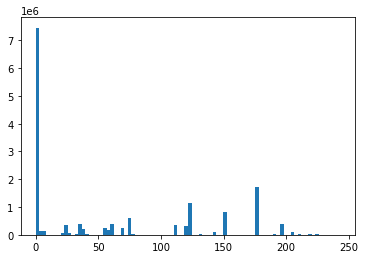

In [22]:
plt.figure()
plt.hist(groundTruth.flatten(), bins = 86)
plt.show()

In [23]:
print(np.unique(groundTruth.flatten()))
print(len(np.unique(groundTruth.flatten())))

[  0   1   2   3   4   5   6  12  13  21  22  23  24  27  28  29  31  33
  36  37  39  42  43  44  46  47  48  49  50  51  53  54  57  58  59  61
  66  67  68  69  70  71  72  74  75  76  77  92 111 112 121 122 123 124
 131 141 142 143 152 176 190 195 204 205 206 208 209 211 212 213 214 216
 217 219 220 221 222 224 225 226 227 228 229 236 242 243]
86


In [55]:
groundTruth_df = pd.DataFrame(groundTruth_table)
table = pd.DataFrame(groundTruth_df.groupby([0]).size())

table['groundType'] = ['Background', 'Corn', 'Cotton', 'Rice', 'Sorghum', 'Soybeans', 'unflower', 'Sweet Corn', 'Pop or Orn Corn', 'Barley', 'Durum Wheat', 'Spring Wheat', 'Winter Wheat', 'Rye', 'Oats', 'Millet', 'Canola', 'Safflower', 'Alfalfa', 
'Other Hay/Non Alfalfa', 'Buckwheat', 'Sugarbeets', 'Botatoes', 'Other Crops', 'Sweet Potatoes', 'Misc Vegs & Fruits', 'Watermelons', 'Onions', 'Cucumbers', 'Chick Peas', 'Peas', 'Tomatoes', 'Herbs', 'Clover/Wildflowers', 
'Sod/grass Seed', 'Fllow/Idle Cropland', 'Cherries', 'Peaches', 'Apples', 'Grapes', 'Christmas Trees', 'Other Tree Crops', 'Citrus', 'Pecans', 'Almonds', 'Walnuts', 'Pears', 'Aquaculture', 'Open Water', 'Perennial Ice/Snow', 
'Developed/Open Space', 'Developed/Low Intensity', 'Developed/Med Intensity', 'Developed/High Intensity', 'Barren', 'Decodipis Forest', 'Evergreen Forest', 'Mixed Forest', 'Shrubland', 'Grassland/Pasture', 'Woody Wetlands', 
'Herbaceous Wetlands', 'Pistachios', 'Triticale', 'Carrots', 'Garlic', 'Cantaloupes', 'Olives', 'Oranges', 'Honeydew Meions', 'Broccoli', 'Peppers', 'Pomegranates', 'Greens', 'Plums', 'Strawberries', 'Squash', 'Vetch', 
'Dbl Crop WinWht/Corn', 'Dbi Crop Oats/Corn', 'Lettuce', 'Dbl Crop Triticale/Corn', 'Pumpkins', 'Dbl Crop Winwht/Sorghum', 'Blueberries', 'Cabbage']

table.to_csv('../data/GroundTruth/LandCover.csv')

In [56]:
table

,0,groundType
0,,
0,7342231,Background
1,114438,Corn
2,467,Cotton
3,140653,Rice
4,1994,Sorghum
...,...,...
228,4151,Dbl Crop Triticale/Corn
229,382,Pumpkins
236,985,Dbl Crop Winwht/Sorghum


0   Background
1   Corn
2   Cotton
3   Rice
4   Sorghum
5   Soybeans
6   unflower
12  Sweet Corn
13  Pop or Orn Corn 
21  Barley
22  Durum Wheat
23  Spring Wheat
24  Winter Wheat
27  Rye
28  Oats
29  Millet
31  Canola
33  Safflower
36  Alfalfa
37  Other Hay/Non Alfalfa
39  Buckwheat
42  Sugarbeets
43  Botatoes
44  Other Crops
46  Sweet Potatoes
47  Misc Vegs & Fruits
48  Watermelons
49  Onions
50  Cucumbers
51  Chick Peas
53  Peas
54  Tomatoes
57  Herbs
58  Clover/Wildflowers
59  Sod/grass Seed
61  Fllow/Idle Cropland
66  Cherries
67  Peaches
68  Apples
69  Grapes
70  Christmas Trees
71  Other Tree Crops
72  Citrus
74  Pecans
75  Almonds
76  Walnuts
77  Pears
92 Aquaculture
111 Open Water
112 Perennial Ice/Snow
121 Developed/Open Space
122 Developed/Low Intensity
123 Developed/Med Intensity
124 Developed/High Intensity
131 Barren
141 Decodipis Forest
142 Evergreen Forest
143 Mixed Forest
152 Shrubland
176 Grassland/Pasture
190 Woody Wetlands
195 Herbaceous Wetlands
204 Pistachios
205 Triticale
206 Carrots
208 Garlic
209 Cantaloupes
211 Olives
212 Oranges
213 Honeydew Meions
214 Broccoli
216  Peppers
217 Pomegranates
219 Greens
220 Plums
221 Strawberries
222 Squash
224 Vetch
225 Dbl Crop WinWht/Corn
226 Dbi Crop Oats/Corn
227 Lettuce
228 Dbl Crop Triticale/Corn
229 Pumpkins
236 Dbl Crop Winwht/Sorghum
242 Blueberries
243 Cabbage

### Apply Machine Learning Method

In [9]:
result_array_table = raster_array_table

### Convert prediction back to raster and visual check

(7, 4188, 3751)
(3751, 4188, 7)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


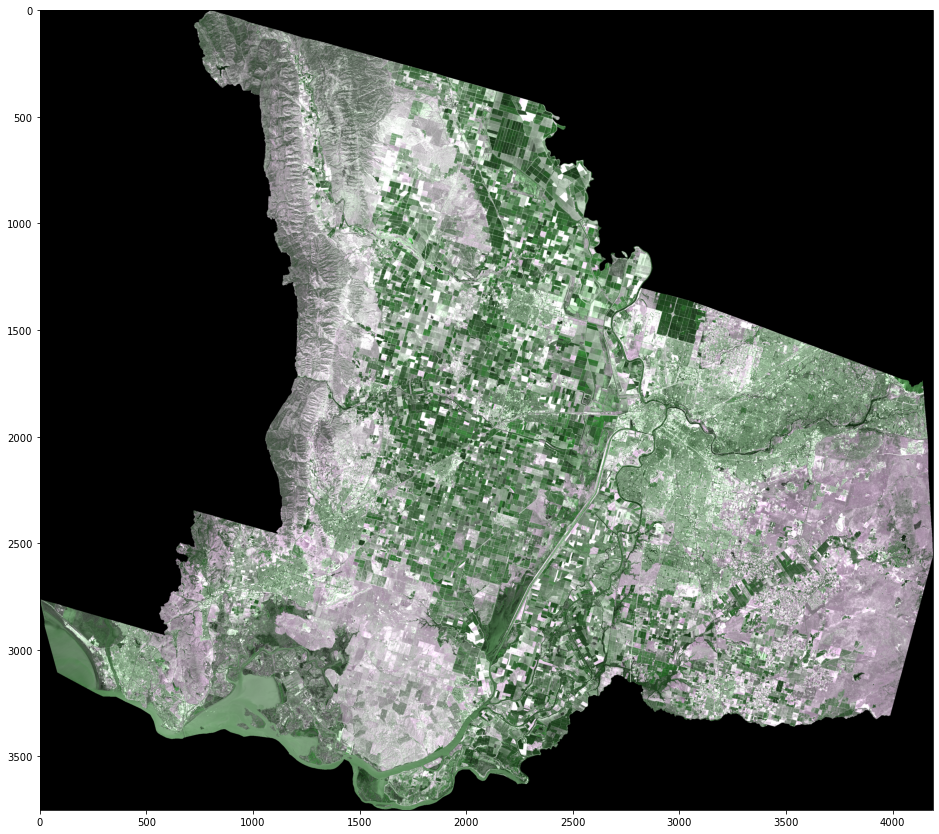

In [10]:
result_array_t = result_array_table.reshape(raster_array_t.shape[0], raster_array_t.shape[1], raster_array_t.shape[2])
print(result_array_t.shape)

result_array = result_array_t.transpose()
print(result_array.shape)

Result_Check = np.dstack((scaleCCMinMax(result_array[:, :, 3]), scaleCCMinMax(result_array[:, :, 2]), scaleCCMinMax(result_array[:, :, 3])))

plt.figure(figsize=(16, 16))
plt.imshow(Result_Check)
# plt.savefig('../results/Image_Pre_Check.png')
plt.show()